In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/store-sales-time-series-forecasting/train.csv')

In [3]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

# All Product Sales sum

In [5]:
salesproduct = df.groupby(['family'])['sales'].sum().reset_index()

In [6]:
salesproduct

,family,sales
0,AUTOMOTIVE,5.548220e+05
1,BABY CARE,1.005100e+04
2,BEAUTY,3.378930e+05
3,BEVERAGES,2.169545e+08
4,BOOKS,6.438000e+03
5,BREAD/BAKERY,4.213395e+07
6,CELEBRATION,7.611770e+05
7,CLEANING,9.752129e+07
8,DAIRY,6.448771e+07
9,DELI,2.411032e+07


Text(0.5, 1.0, 'All Product Sales')

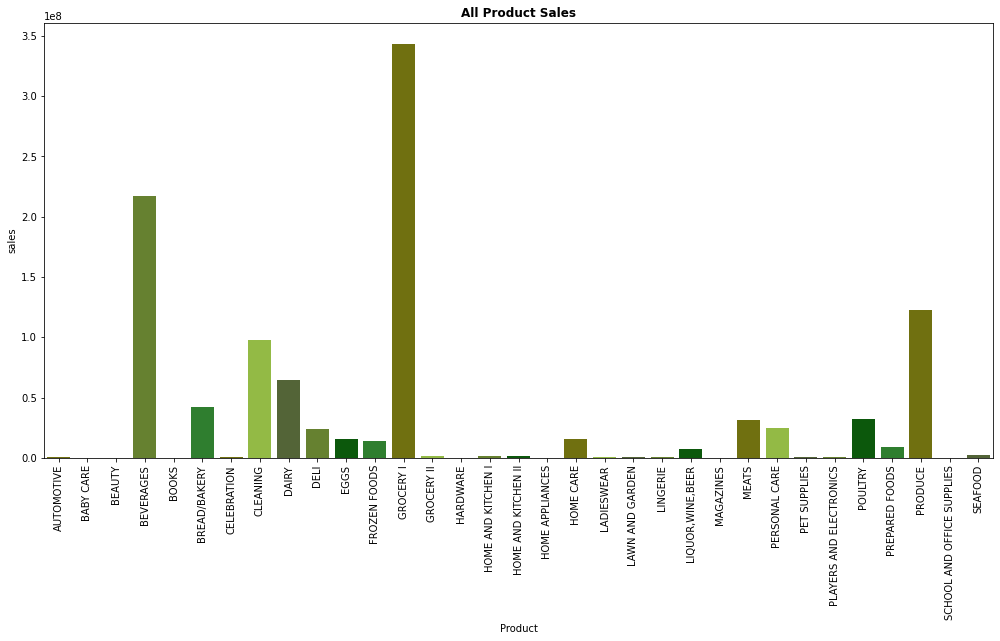

In [7]:
fig = plt.figure(figsize=(17,8))
color = ['#808000','#9ACD32','#556B2F','#6B8E23','#006400','#228B22']
sns.barplot(x=salesproduct['family'],y=salesproduct['sales'], palette = color)
plt.tick_params(axis = 'x',rotation = 90)
plt.xlabel('Product',)
plt.title('All Product Sales',fontweight='bold')

# Extract one product is AUTOMOTIVE

In [8]:
sales = df[df['family']=='AUTOMOTIVE']

In [9]:
data= sales[['date','sales']]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90936 entries, 0 to 3000855
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    90936 non-null  object 
 1   sales   90936 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.1+ MB


In [11]:
#date colum is object convert datetime

In [12]:
data['date'] = pd.to_datetime(data['date'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90936 entries, 0 to 3000855
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    90936 non-null  datetime64[ns]
 1   sales   90936 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 MB


#change column name

In [14]:
data.columns=['ds','y']

In [15]:
data

,ds,y
0,2013-01-01,0.0
33,2013-01-01,0.0
66,2013-01-01,0.0
99,2013-01-01,0.0
132,2013-01-01,0.0
...,...,...
3000723,2017-08-15,8.0
3000756,2017-08-15,7.0
3000789,2017-08-15,5.0
3000822,2017-08-15,4.0


<AxesSubplot:xlabel='ds', ylabel='y'>

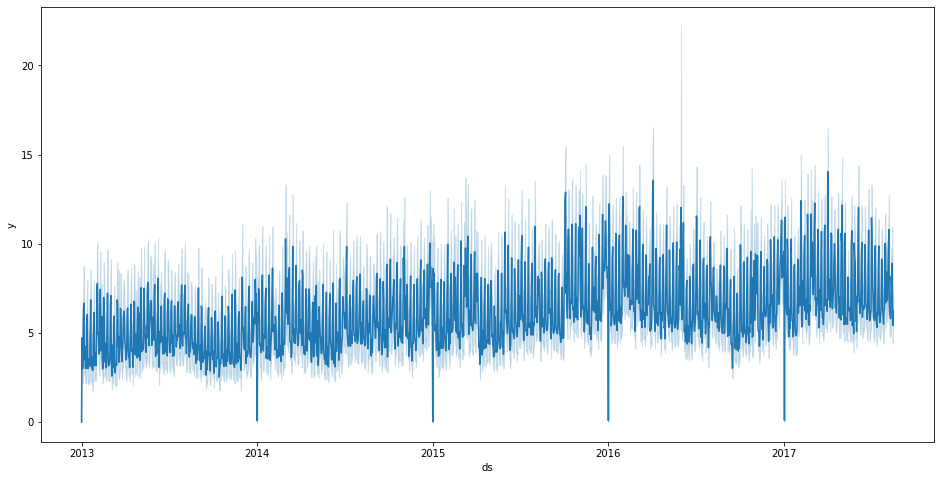

In [16]:
fig = plt.figure(figsize=(16,8))
sns.lineplot(x=data['ds'],y=data['y'])

# import model and fit

In [17]:
from fbprophet import Prophet

In [18]:
model = Prophet()

In [19]:
model.fit(data)

Initial log joint probability = -46.4751
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        296309    0.00310284       14732.2           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        296335    0.00295653       6623.51           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        296348   0.000461044        1345.7           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        296354   0.000727502       2240.76           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        296356   4.85325e-05        334.55           1           1      563   
    Iter      log prob        ||dx||      ||grad||       alpha  

   296356   0.000169231        237.44           1           1      570   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [20]:
#Predict model

In [21]:
future = model.make_future_dataframe(periods = 365)

In [22]:
future.tail()

,ds
2044,2018-08-11
2045,2018-08-12
2046,2018-08-13
2047,2018-08-14
2048,2018-08-15


In [23]:
data.tail()

,ds,y
3000723,2017-08-15,8.0
3000756,2017-08-15,7.0
3000789,2017-08-15,5.0
3000822,2017-08-15,4.0
3000855,2017-08-15,15.0


In [24]:
#2017-08-15 to 2018-08-15 predict

In [25]:
py = model.predict(future)

In [26]:
#yhat your value

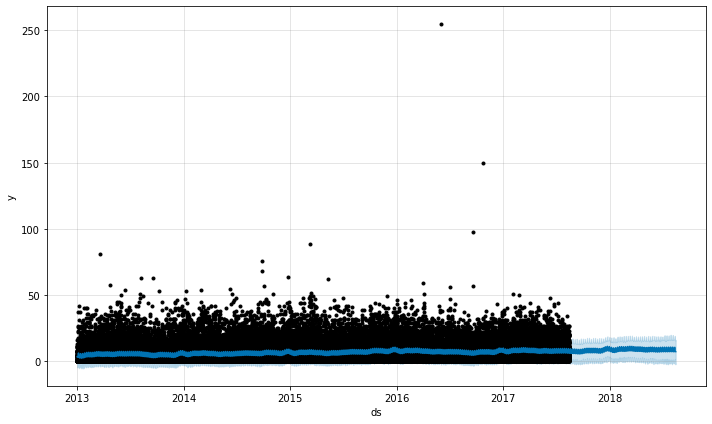

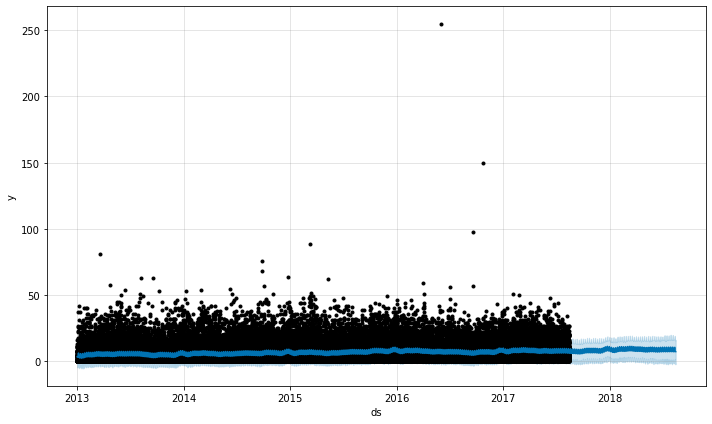

In [27]:
model.plot(py)

In [28]:
py

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3.639464,-4.552918,11.180683,3.639464,3.639464,-0.109501,-0.109501,-0.109501,-0.860016,-0.860016,-0.860016,0.750514,0.750514,0.750514,0.0,0.0,0.0,3.529962
1,2013-01-02,3.644922,-4.289530,11.497892,3.644922,3.644922,-0.213298,-0.213298,-0.213298,-0.880286,-0.880286,-0.880286,0.666988,0.666988,0.666988,0.0,0.0,0.0,3.431624
2,2013-01-03,3.650380,-4.612222,10.557628,3.650380,3.650380,-0.540061,-0.540061,-0.540061,-1.119096,-1.119096,-1.119096,0.579034,0.579034,0.579034,0.0,0.0,0.0,3.110319
3,2013-01-04,3.655838,-4.030047,11.621504,3.655838,3.655838,-0.284621,-0.284621,-0.284621,-0.773067,-0.773067,-0.773067,0.488446,0.488446,0.488446,0.0,0.0,0.0,3.371217
4,2013-01-05,3.661296,-1.600948,13.760697,3.661296,3.661296,2.318630,2.318630,2.318630,1.921579,1.921579,1.921579,0.397051,0.397051,0.397051,0.0,0.0,0.0,5.979926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,2018-08-11,8.601111,0.798636,18.950300,3.618800,13.080967,1.634130,1.634130,1.634130,1.921579,1.921579,1.921579,-0.287449,-0.287449,-0.287449,0.0,0.0,0.0,10.235241
2045,2018-08-12,8.603881,1.732754,19.368852,3.606489,13.119087,2.023302,2.023302,2.023302,2.332082,2.332082,2.332082,-0.308780,-0.308780,-0.308780,0.0,0.0,0.0,10.627183
2046,2018-08-13,8.606651,-1.151581,16.760132,3.594178,13.140179,-0.951307,-0.951307,-0.951307,-0.621197,-0.621197,-0.621197,-0.330110,-0.330110,-0.330110,0.0,0.0,0.0,7.655344
2047,2018-08-14,8.609422,-2.262543,15.734897,3.581866,13.161271,-1.211189,-1.211189,-1.211189,-0.860016,-0.860016,-0.860016,-0.351173,-0.351173,-0.351173,0.0,0.0,0.0,7.398232


In [29]:
prediction = py[['ds','yhat']]

<AxesSubplot:xlabel='ds', ylabel='yhat'>

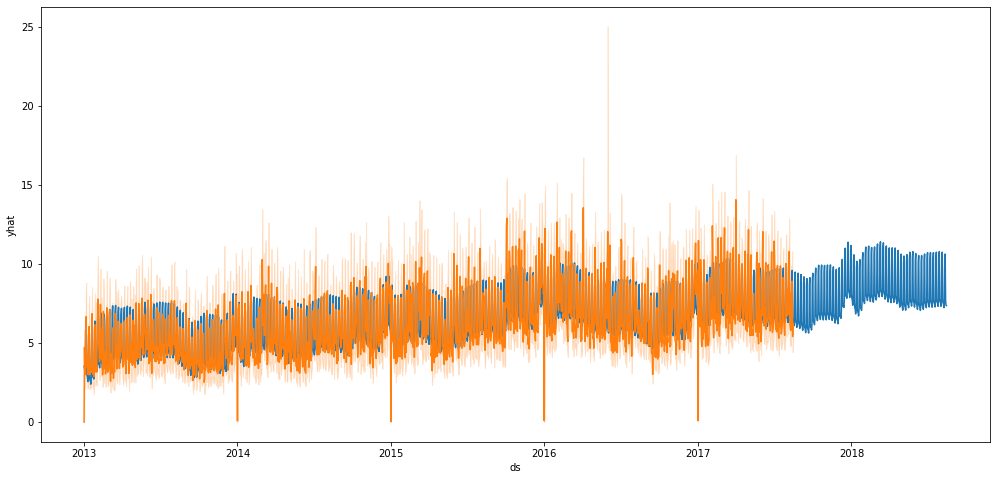

In [30]:
fig = plt.figure(figsize=(17,8))
sns.lineplot(x=prediction['ds'],y=prediction['yhat'])
sns.lineplot(x=data['ds'],y=data['y'])

crossvalidation model check MAE,MSE

In [31]:
from fbprophet.diagnostics import cross_validation

In [32]:
cv= cross_validation(model,initial = '730 days',period = '180 days',horizon = '365 days')

  0%|          | 0/4 [00:00<?, ?it/s]

Initial log joint probability = -134.758
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       89269.4    0.00537334       369.827           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       89271.4   0.000153017       387.358      0.5984      0.5984      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       89272.7   3.61882e-05       147.276           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     339       89272.9   2.14749e-05       182.184   2.138e-07       0.001      456  LS failed, Hessian reset 
     399       89273.2   0.000486943       281.002      0.5712      0.5712      532   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       89273.5   0.000110197    

In [33]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-02-23,5.408428,-1.962112,13.327459,0.0,2015-02-22
1,2015-02-23,5.408428,-2.413366,13.151274,11.0,2015-02-22
2,2015-02-23,5.408428,-2.047338,13.142522,10.0,2015-02-22
3,2015-02-23,5.408428,-2.667421,13.135017,0.0,2015-02-22
4,2015-02-23,5.408428,-2.004555,13.408257,4.0,2015-02-22


In [34]:
from fbprophet.diagnostics import performance_metrics

In [35]:
m =performance_metrics(cv)
m.head()

,horizon,mse,rmse,mae,mdape,coverage
0,37 days,37.485527,6.122542,4.310568,0.565150,0.877722
1,38 days,37.708562,6.140730,4.315759,0.565443,0.877696
2,39 days,37.845801,6.151894,4.322396,0.567683,0.877492
3,40 days,37.845078,6.151835,4.323868,0.568586,0.878103
4,41 days,38.056830,6.169022,4.340639,0.570338,0.877085


In [36]:
from fbprophet.plot import plot_cross_validation_metric


/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


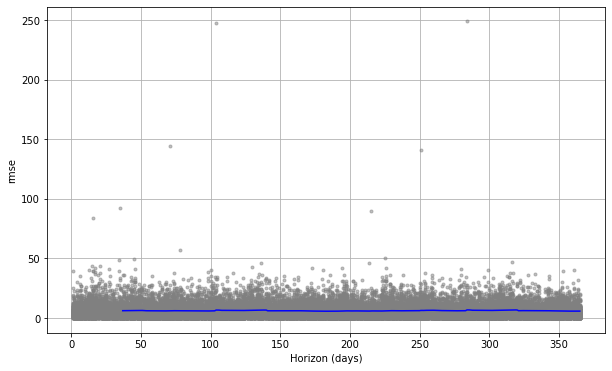

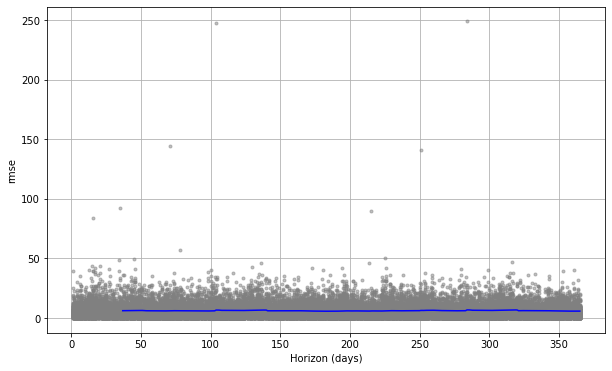

In [37]:
plot_cross_validation_metric(cv,metric = 'rmse')